<p><font size="6"><b>CASE - Sea Surface Temperature data</b></font></p>


> *DS Python for GIS and Geoscience*  
> *September, 2023*
>
> *© 2023, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr

For this use case, we focus on the [Extended Reconstructed Sea Surface Temperature (ERSST)](https://www.ncdc.noaa.gov/data-access/marineocean-data/extended-reconstructed-sea-surface-temperature-ersst-v4), a widely used and trusted gridded compilation of historical Sea Surface Temperature (SST).

> The Extended Reconstructed Sea Surface Temperature (ERSST) dataset is a global monthly sea surface temperature dataset derived from the International Comprehensive Ocean–Atmosphere Dataset (ICOADS). It is produced on a 2° × 2° grid with spatial completeness enhanced using statistical methods. This monthly analysis begins in January 1854 continuing to the present and includes anomalies computed with respect to a 1971–2000 monthly climatology. 



First we download the dataset. We will use the [NOAA Extended Reconstructed Sea Surface Temperature (ERSST)](https://psl.noaa.gov/thredds/catalog/Datasets/noaa.ersst/catalog.html?dataset=Datasets/noaa.ersst/sst.mnmean.v4.nc) v4 product. Download the data from this link: https://psl.noaa.gov/thredds/fileServer/Datasets/noaa.ersst/sst.mnmean.v4.nc and store it in a subfolder `data/` from the notebook as `sst.mnmean.v4.nc`.

Reading in the data set, ignoring the `time_bnds` variable:

In [3]:
data = './data/sst.mnmean.v4.nc'
ds = xr.open_dataset(data, drop_variables=['time_bnds'], engine="h5netcdf")

In [4]:
ds # looks like monthly data

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 1994)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2020-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/30)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...

For this use case, we will focus on the years after 1960, so we slice the data from 1960 and load the data into our computer memory. By only loading the data after the initial slice, we make sure to only load into memory the data we specifically need:

In [5]:
ds = ds.sel(time=slice('1960', '2018')).load()  # load into memory
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 708)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/30)
    history:                 created 10/2014 by CAS using NCDC's ERSST V4 asc...
    title:                   NOAA Extended Reconstructed Sea Surface Temperat...
    climatology:             Climatology is based on 1971-2000 SST, Xue, Y., ...
    description:             In situ data: ICOADS2.5 before 2007 and NCEP in ...
    citation:                Huang et al, 2014: Extended Reconstructed Sea Su...
    comment:                 SSTs were observed by conventional thermometers ...
    ...                      ...
    license:                 No constraints on data access or use
    original_publisher_url:  http://www.ncdc.noaa.gov
    dataset_title:           Extended Reconstructed Sea Surface Temperature (...
    Source:                  http://www.ncdc.noaa.gov/data-access/marineocean...
    data_modified:           2020-03-03
    References:              http://www.psl.noaa.gov/data/gridded/data.noaa.e...

The data with the extension `nc` is a NetCDF format. NetCDF (Network Common Data Format) is the most widely used format for distributing geoscience data. NetCDF is maintained by the [Unidata](https://www.unidata.ucar.edu/) organization. Check the [netcdf website](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit) for more information. Xarray was designed to make reading netCDF files in python as easy, powerful, and flexible as possible.

__Note:__ As the data is in a [OPeNDAP server](https://en.wikipedia.org/wiki/OPeNDAP), we could also load the NETCDF data directly without downloading anything. This would require us to add the `netcdf4` package in our conda environment

### Exploratory data analysis

The data contains a single data variable `sst` and has 3 dimensions: lon, lat and time each described by a coordinate. Let's first get some insight in the structure and content of the data.

<div class="alert alert-success">

**EXERCISE 1**:

- What is the total amount of elements/values in the xarray data set?
- How many elements are there in the different dimensions   
- The metadata of a netcdf file is also interpreted by xarray. Are the attributes on the xarray.Dataset `ds` the same as the attributes of the `sst` data itself?
   
<details>

<summary>Hints</summary>
    
- The number of elements or `size` of an array is an attribute of an xarray.DataArray and not of a xarray.Dataset
- Also the `shape` of an array is an attribute of an xarray.DataArray. A xarray.Dataset has the `dims` attribute to query dimension sizes

</details>    
    
</div>

In [10]:
# note the difference between size and count 
# - size counts all values (i.e., it multiplies all dimensions)
# - count counts all NON-NULL values
ds["sst"].size

11342160

In [13]:
print(ds['lon'].size)
print(ds['lat'].size)
print(ds['time'].size)

180
89
708


In [29]:
print(ds["sst"].shape)
print(ds["sst"].dims)

(708, 89, 180)
('time', 'lat', 'lon')


In [22]:
# No CRS information
print(ds.rio.crs)

# There is transform information
print(ds.rio.transform())

# 
print(ds.attrs)
print()
print(ds['sst'].attrs)

None
| 2.00, 0.00,-1.00|
| 0.00,-2.00, 89.00|
| 0.00, 0.00, 1.00|
{'history': "created 10/2014 by CAS using NCDC's ERSST V4 ascii values", 'title': 'NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in situ only)', 'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.', 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.', 'citation': 'Huang et al, 2014: Extended Reconstructed Sea Surface Temperatures Version 4 (ERSST.v4), Part I. Upgrades and Intercomparisons. Journal of Climate.', 'comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker', 'Conventions': 'CF-1.2', 'institution': 'This version written at NOAA/ESRL PSD: obtained from

In [ ]:
# %load _solutions/case-sea-surface-temperature1.py
# size attribute of array object
ds["sst"].size

In [ ]:
# %load _solutions/case-sea-surface-temperature2.py
# shape attribute of array object
ds["sst"].shape

In [ ]:
# %load _solutions/case-sea-surface-temperature3.py
# dims attribute of dataset object
ds.dims

In [ ]:
# %load _solutions/case-sea-surface-temperature4.py
# attributes of array
ds["sst"].attrs

In [ ]:
# %load _solutions/case-sea-surface-temperature5.py
# attributes of data set
ds.attrs

---------

As we work with a single data variable, we will introduce a new variable `sst` which is the `xarray.DataArray` of the SST values. Note that we only keep the attributes on the xarray.DataArray level.

In [30]:
sst = ds["sst"]

In [31]:
# This is a data array
sst

<xarray.DataArray 'sst' (time: 708, lat: 89, lon: 180)>
array([[[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
...
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.77, -1.77, -1.76, ..., -1.78, -1.77, -1.77],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.7 , -1.74, -1.67, ..., -1.8 , -1.76, -1.69],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        [-1.8 , -1.8 , -1.8 , ..., -1.8 , -1.8 , -1.8 ],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

<div class="alert alert-success">

**EXERCISE 2**:

Make an image plot of the SST in the first month of the data set, January 1960. Adjust the range of the colorbar and switch to the `coolwarm` colormap.
   
<details>

<summary>Hints</summary>
    
- xarray can interpret a date string in the [ISO 8601](https://nl.wikipedia.org/wiki/ISO_8601) format as a date, e.g. `2020-01-01`.
- adjust ranges of the colorbar with `vmin` and `vmax`.

</details>    
    
</div>

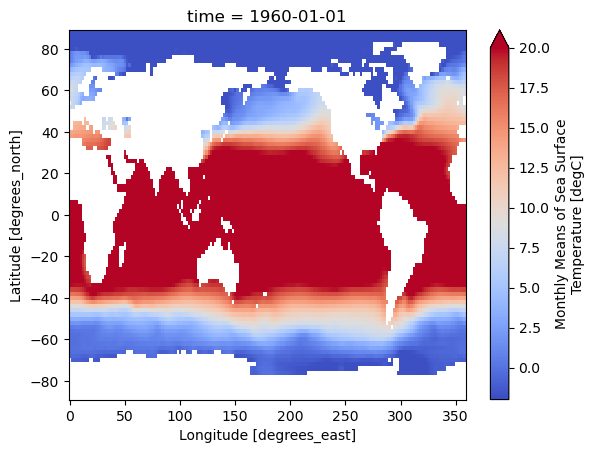

In [41]:
sst.sel(time = "1960-01").plot(cmap = 'coolwarm', vmin = -2, vmax = 20)

In [ ]:
# %load _solutions/case-sea-surface-temperature6.py
sst.sel(time="1960-01-01").plot.pcolormesh(vmin=-2, vmax=30, 
                                           cmap="coolwarm")

__Note__ 
xaray uses xarray.plot.pcolormesh() as the default two-dimensional plot method because it is more flexible than xarray.plot.imshow(). However, for large arrays, imshow can be much faster than pcolormesh. If speed is important to you and you are plotting a regular mesh, consider using imshow.

<div class="alert alert-success">

**EXERCISE 3**:
    
How did the SST evolve in time for a specific location on the earth? Make a line plot of the SST at `lon=300`, `lat=50` as a function of time.
    
Do you recognize the seasonality of the data?
   
<details>

<summary>Hints</summary>
    
- Use the `sel` for both the lon/lat selection.

</details>    
    
</div>

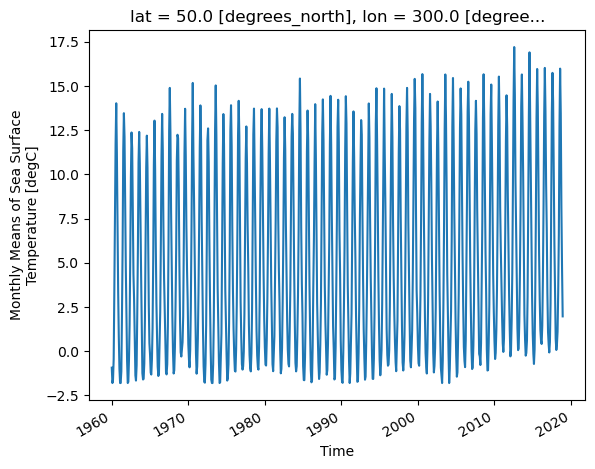

In [43]:
sst.sel(lon = 300, lat = 50).plot();

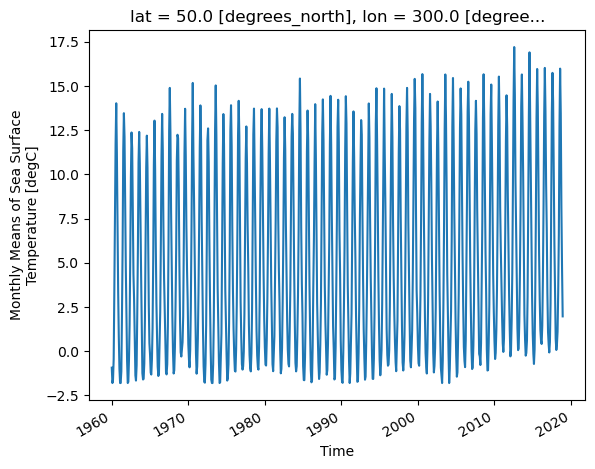

In [45]:
# %load _solutions/case-sea-surface-temperature7.py
sst.sel(lon=300, lat=50).plot.line();

<div class="alert alert-success">

**EXERCISE 4**:

What is the evolution of the SST as function of the month of the year?
    
Calculate the average SST with respect to the _month of the year_ for all positions in the data set and store the result as a variable `ds_mm`.

Use the `ds_mm` variable to make a plot: For longitude `164`, make a comparison in between the monthly average at latitude `-23.4` versus latitude `23.4`. Use a line plot with in the x-axis the month of the year and in the y-axis the average SST.
   
<details>

<summary>Hints</summary>
    
- Use the `sel` for both the lon/lat selection.
- If the exact values are not in the coordinate, you can use the `method="nearest"` inside a selection.

</details>    
    
</div>

In [52]:
# The group by is through the month values
ds_mm = sst.groupby(sst.time.dt.month).mean(dim = "time")

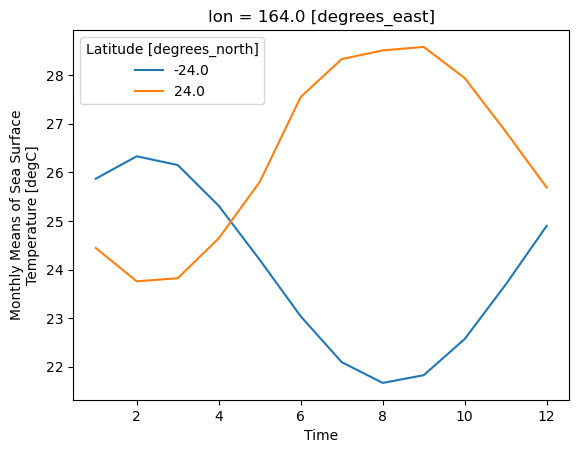

In [61]:
ds_mm.sel(lon = 164, lat = [-23.4, 23.4], method = "nearest").plot(x = 'month', hue = 'lat');

In [62]:
# %load _solutions/case-sea-surface-temperature8.py
ds_mm = sst.groupby(sst.time.dt.month).mean(dim='time')

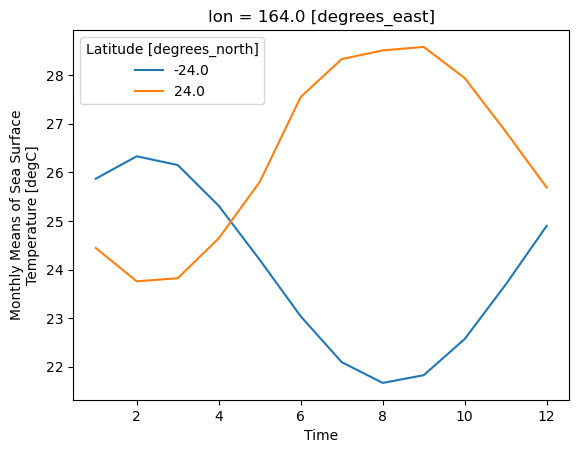

In [63]:
# %load _solutions/case-sea-surface-temperature9.py
ds_mm.sel(lon=164, lat=[-23.4, 23.4], method="nearest").plot.line(hue="lat");

<div class="alert alert-success">

**EXERCISE 5**:
    
How does the zonal mean climatology for each month of the year changes with the latitude? 

Reuse the `ds_mm` from the previous exercise or recalculate the average SST with respect to the _month of the year_ for all positions in the data set and store the result as a variable `ds_mm`.
    
To check the mean climatology (aggregating over the longitudes) as a function of the latitude for each month in the year, calculate the average SST over the `lon` dimension from `ds_mm`. Plot the result as an image with the month of the year in the x-axis and the latitude in the y-axis. 
   
<details>

<summary>Hints</summary>

- You do not need another `groupby`, but need to calculate a reduction along a dimension.

</details>    
    
</div>

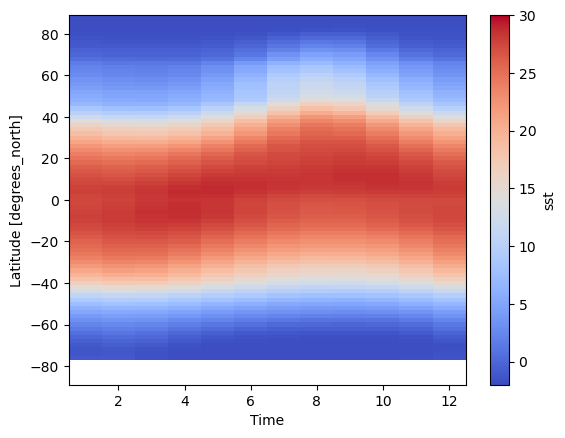

In [67]:
ds_mm.mean(dim='lon').plot.pcolormesh(x = 'month', y = 'lat', vmin = -2, vmax = 30, cmap = 'coolwarm')

In [ ]:
# %load _solutions/case-sea-surface-temperature10.py
ds_mm = sst.groupby(sst.time.dt.month).mean(dim='time')

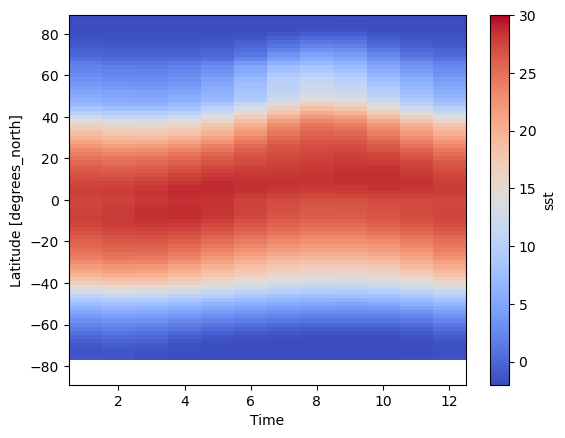

In [71]:
# %load _solutions/case-sea-surface-temperature11.py
ds_mm.mean(dim='lon').plot.imshow(x="month", y="lat", vmin=-2, vmax=30, cmap="coolwarm")

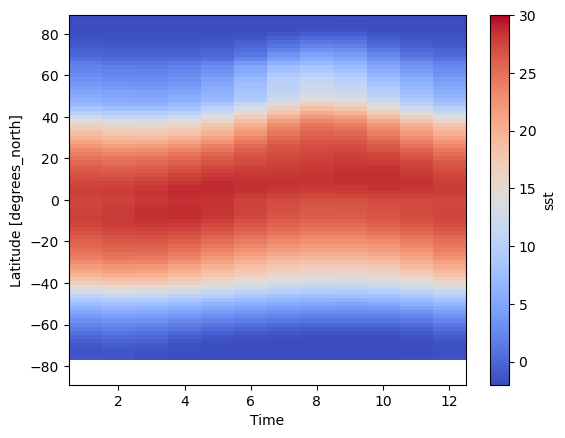

In [72]:
# %load _solutions/case-sea-surface-temperature12.py
# alternative using transpose instead of defining the x and y in the plot function
ds_mm.mean(dim='lon').transpose().plot.imshow(vmin=-2, vmax=30, cmap="coolwarm")

<div class="alert alert-success">

**EXERCISE 6**:
    
How different is the mean climatology in between January and July?

Reuse the `ds_mm` variable from the previous exercises or recalculate the average SST with respect to the _month of the year_ for all positions in the data set and store the result as a variable `ds_mm`.
    
Calculate the difference of the mean climatology between January an July and plot the result as an image (map) with the longitude of the year in the x-axis and the latitude in the y-axis. 
   
<details>

<summary>Hints</summary>

- You can subtract xarray just as Numpy arrays. You do not need another `groupby`, but only selections from the `ds_mm` variable. 

</details>    
    
</div>

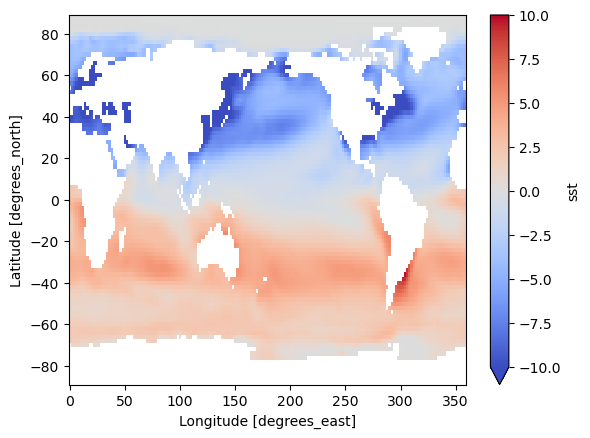

In [78]:
jan = ds_mm.sel(month = 1)
jul = ds_mm.sel(month = 7)

diff = jan-jul

diff.plot(vmin = -10, vmax = 10, cmap = 'coolwarm');

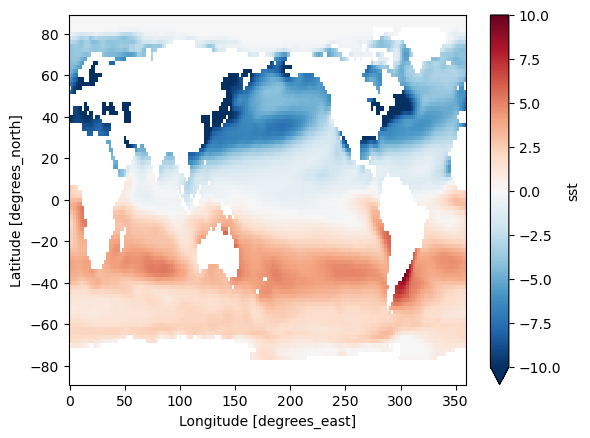

In [80]:
# %load _solutions/case-sea-surface-temperature13.py
(ds_mm.sel(month=1) - ds_mm.sel(month=7)).plot.imshow(vmax=10)

### Calculate the residual by removing climatology

To understand how the SST temperature evolved as a function of time during the last decades, we want to remove this climatology from the dataset and examine the residual, called the anomaly, which is the interesting part from a climate perspective. 

We will do this by subtracting the monthly average from the values of that specific month. Hence, subtract the average January value over the years from the January data, subtract the average February value over the years from the February data,...

Removing the seasonal climatology is an example of a transformation: it operates over a group, but does not change the size of the dataset as we do the operation on each element (`x - x.mean()`) 

This is not the same as the aggregations (e.g. `average`) we applied on each of the groups earlier. When using `groupby`, a calculation to the group can be applied and just like in Pandas, these calculations can either be:

- _aggregation_: reduces the size of the group
- _transformation_: preserves the groups full size

One way to consider is that we `apply` a function to each of the groups. For our anomaly calculation we want to do a _transformation_ and apply the following function:

In [81]:
def remove_time_mean(x):
    """Subtract each value by the mean over time"""
    return x - x.mean(dim='time')

We can `apply` this function to each of the groups:

In [82]:
sst = ds["sst"]

# Effectively what we are doing here is grouping the dataset by month, and using those groups to 
# execute the "mean" function in the custom function

# x is the grouped by dataset (i.e., the full dataset), while x.mean() will average the grouped objects over time
ds_anom = sst.groupby('time.month').apply(remove_time_mean)

# Notice that this retained the shape of the original dataset
ds_anom

<xarray.DataArray 'sst' (time: 708, lat: 89, lon: 180)>
array([[[-3.55851650e-03, -3.55851650e-03, -3.38900089e-03, ...,
         -2.88057327e-03, -3.55851650e-03, -3.72791290e-03],
        [-7.79581070e-03, -8.30423832e-03, -8.98241997e-03, ...,
         -3.72803211e-03, -4.57561016e-03, -5.08403778e-03],
        [-8.81290436e-03, -9.66036320e-03, -1.23721361e-02, ...,
         -5.08403778e-03, -6.77907467e-03, -8.98241997e-03],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.18553638e-03,  9.53674316e-07,  9.53674316e-07, ...,
         -1.01613998e-03, -1.35505199e-03, -1.35505199e-03],
        [-1.49145126e-02, -1.93213224e-02, -2.13551521e-02, ...,
         -5.08391857e-03, -8.13484192e-03, -1.28805637e-02],
        [-1.50841475e-02, -1.83044672e-02, -2.23722458e-02, ...,
         -4.74500656e-03, -7.79581070e-03, -1.05077028e-02],
...
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.96602345e-02, -2.11856365e-02, -2.20330954e-02, ...,
         -1.25415325e-02, -1.55924559e-02, -1.81348324e-02],
        [-2.18636990e-02, -2.45755911e-02, -2.66094208e-02, ...,
         -1.25415325e-02, -1.61008835e-02, -1.94908381e-02],
        [-2.79653072e-02, -3.10163498e-02, -3.33890915e-02, ...,
         -1.40670538e-02, -2.05078125e-02, -2.59313583e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01

In other words: 

> subtract each element by the average over time of all elements of the month the element belongs to

Xarray makes these sorts of transformations easy by supporting groupby arithmetic. This concept is easiest explained by applying it for our application:

In [83]:
# This gives the exact same result as the above but is much more intuitive

gb = sst.groupby('time.month')  # make groups (in this example each month of the year is a group) 
ds_anom = gb - gb.mean(dim='time')  # subtract each element of the group/month by the mean of that group/month over time 
ds_anom

<xarray.DataArray 'sst' (time: 708, lat: 89, lon: 180)>
array([[[-3.55851650e-03, -3.55851650e-03, -3.38900089e-03, ...,
         -2.88057327e-03, -3.55851650e-03, -3.72791290e-03],
        [-7.79581070e-03, -8.30423832e-03, -8.98241997e-03, ...,
         -3.72803211e-03, -4.57561016e-03, -5.08403778e-03],
        [-8.81290436e-03, -9.66036320e-03, -1.23721361e-02, ...,
         -5.08403778e-03, -6.77907467e-03, -8.98241997e-03],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.18553638e-03,  9.53674316e-07,  9.53674316e-07, ...,
         -1.01613998e-03, -1.35505199e-03, -1.35505199e-03],
        [-1.49145126e-02, -1.93213224e-02, -2.13551521e-02, ...,
         -5.08391857e-03, -8.13484192e-03, -1.28805637e-02],
        [-1.50841475e-02, -1.83044672e-02, -2.23722458e-02, ...,
         -4.74500656e-03, -7.79581070e-03, -1.05077028e-02],
...
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[-1.96602345e-02, -2.11856365e-02, -2.20330954e-02, ...,
         -1.25415325e-02, -1.55924559e-02, -1.81348324e-02],
        [-2.18636990e-02, -2.45755911e-02, -2.66094208e-02, ...,
         -1.25415325e-02, -1.61008835e-02, -1.94908381e-02],
        [-2.79653072e-02, -3.10163498e-02, -3.33890915e-02, ...,
         -1.40670538e-02, -2.05078125e-02, -2.59313583e-02],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 2018-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

Now we can view the climate signal without the overwhelming influence of the seasonal cycle:

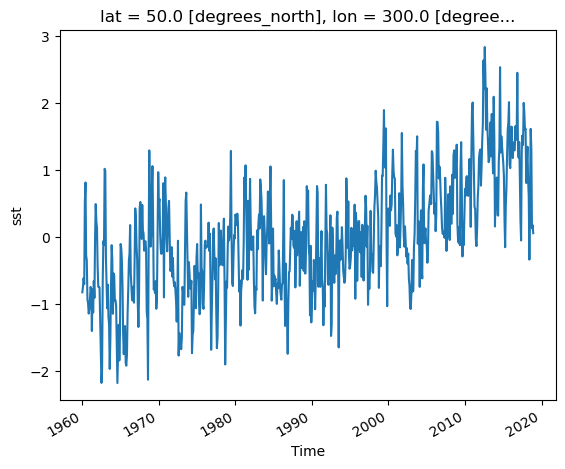

In [84]:
# Seasonal cycle removed, so any changes are actual temperature changes
ds_anom.sel(lon=300, lat=50).plot.line();

Check the difference between Jan. 1 2018 and Jan. 1 1960 to see where the evolution in time is the largest:

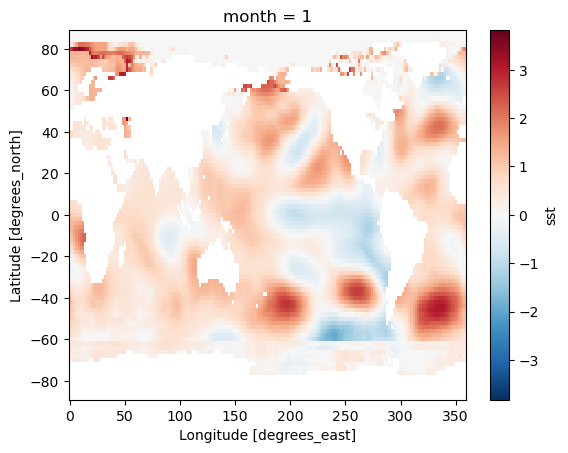

In [85]:
(ds_anom.sel(time='2018-01-01') - ds_anom.sel(time='1960-01-01')).plot()

<div class="alert alert-success">

**EXERCISE 7**:
    
Compute the _five-year median_ of the `ds_anom` variable for the location `lon=300`, `lat=50` as well as the 12 month rolling median of the same data set. Store the output as respectively `ds_anom_resample` and `ds_anom_rolling`.
    
Make a line plot as a function of time for the location `lon=300`, `lat=50` of the original `ds_anom` data, the resampled data and the rolling median data.
   
<details>

<summary>Hints</summary>

- If you only need a single location, do the slicing (selecting) first instead of calculating them for all positions.
- Use the `resample` and the `rolling` functions.


</details>    
    
</div>

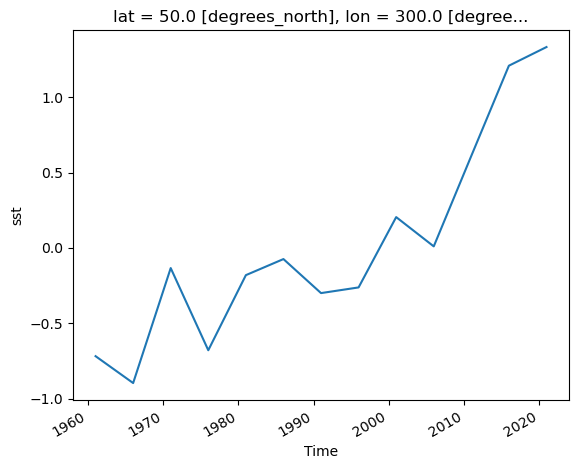

In [120]:
# 5 year median
# resample takes data at 5Y intervals - it's similar to groupby so you need an aggregation function
ds_anom_resample = ds_anom.resample(time="5Y").median().sel(lon = 300, lat = 50)

# Note the sst values: 0 is equivalent to the average temperature in that month between 1960 and 2020
ds_anom_resample.plot();

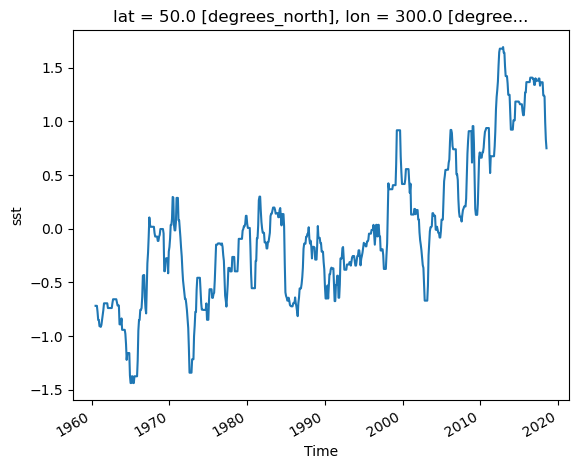

In [105]:
# Note the rolling syntax
ds_anom_rolling = ds_anom.rolling(time = 12, center = True).median().sel(lon = 300, lat = 50)

ds_anom_rolling.plot();

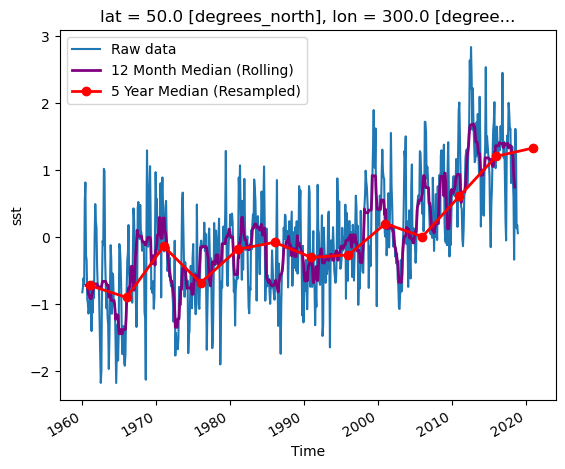

In [125]:
f, ax = plt.subplots()


ds_anom.sel(lon = 300, lat = 50).plot(label = "Raw data", ax = ax)
ds_anom_rolling.plot(label = "12 Month Median (Rolling)", ax = ax, linewidth = 2, c = 'purple')
ds_anom_resample.plot(marker = 'o', label = "5 Year Median (Resampled)", ax = ax, linewidth = 2, c = 'r')

ax.legend();

In [122]:
# %load _solutions/case-sea-surface-temperature14.py
# slice the point of interest
ds_anom_loc = ds_anom.sel(lon=300, lat=50)

In [123]:
# %load _solutions/case-sea-surface-temperature15.py
# compute the resampling and rolling
ds_anom_resample = ds_anom_loc.resample(time='5Y').median(dim='time')
ds_anom_rolling = ds_anom_loc.rolling(time=12, center=True).median()

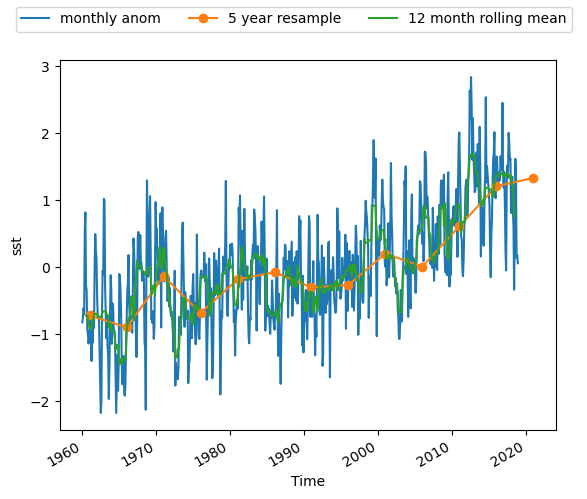

In [124]:
# %load _solutions/case-sea-surface-temperature16.py
# make a combined plot
fig, ax = plt.subplots()
ds_anom_loc.plot.line(ax=ax, label="monthly anom")
ds_anom_resample.plot.line(marker='o', label="5 year resample")
ds_anom_rolling.plot.line(label='12 month rolling mean')
fig.legend(loc="upper center", ncol=3)
ax.set_title("");

### Make projection aware maps

The previous maps were the default outputs of xarray without specification of the spatial context. For reporting these plots are not appropriate. We can use the [cartopy](https://scitools.org.uk/cartopy/docs/latest/) package to adjust our Matplotlib axis to make them spatially aware. 

For more in-depth information on cartopy, see the [visualization-03-cartopy](./visualization-03-cartopy.ipynb) notebook. As a short recap, to make sure the data of xarray can be integrated in a cartopy plot, the crucial element is to define the `transform` argument to to control which coordinate system that the given data is in. You can add the transform keyword with an appropriate `cartopy.crs.CRS` instance from the `import cartopy.crs` module:

C:\Users\tranq\anaconda3\envs\gdal\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


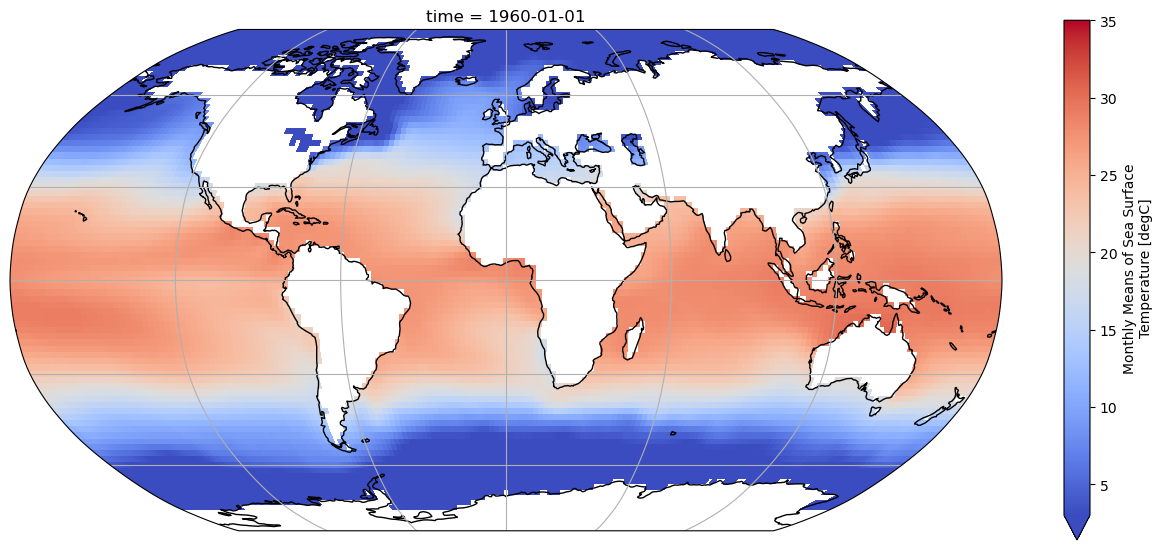

In [126]:
import cartopy.crs as ccrs
import cartopy

map_proj = ccrs.Robinson()  # Define the projection

fig, ax = plt.subplots(figsize = (16,9), subplot_kw={"projection": map_proj})
ax.gridlines()
ax.coastlines()

# Plot data from Jan 1960
sst.sel(time="1960-01-01").plot(ax=ax, vmin=-2, vmax=30,  center=5,
                                cmap='coolwarm', transform = ccrs.PlateCarree(), # tranform argument
                                cbar_kwargs={'shrink':0.75})

<div class="alert alert-success">

**EXERCISE 8**:
    
Make a plot of the `ds_anom` variable of 2018-01-01 with cartopy.
    
- Use the `ccrs.Orthographic` with the central lon/lat on -20, 5
- Add coastlines and gridlines to the plot    
   
   
</div>

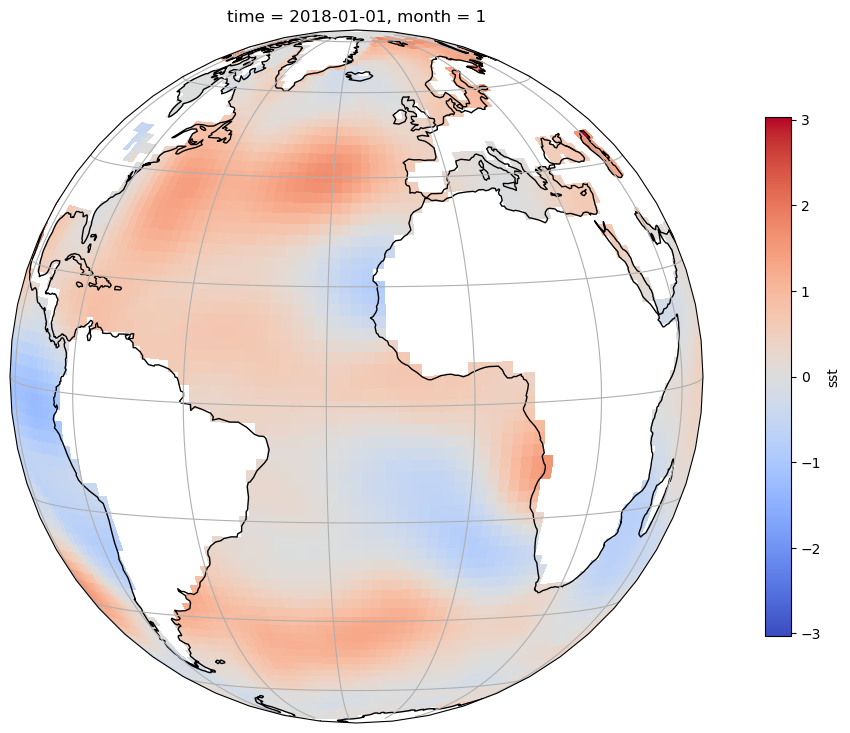

In [132]:
# First, create map projection
map_proj = ccrs.Orthographic(-20, 5)

# Ensure that axes use the map project
fig, ax = plt.subplots(figsize = (16,9), subplot_kw={"projection": map_proj})
ax.gridlines()
ax.coastlines()

# Red = warmer than average, blue = colder than average
ds_anom.sel(time = "2018-01-01").plot(
    ax = ax,
    # vmin = -2, vmax = 30,
    # center = 5,
    cmap = 'coolwarm',
    transform = ccrs.PlateCarree(),
    cbar_kwargs={'shrink':0.75}
);

In [ ]:
# %load _solutions/case-sea-surface-temperature17.py

### Spatial aggregate per basin

Apart from aggregations as a function of time, also spatial aggregations using other (spatial) data sets can be achieved. In the next section, we want to compute the average SST over different ocean basins. The http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NODC/.WOA09/.Masks/.basin/ is a data set that contains the main ocean basins in lon/lat:

In [133]:
basin = xr.open_dataset("./data/basin.nc")
basin = basin.rename({'X': 'lon', 'Y': 'lat'})
basin["basin"]

<xarray.DataArray 'basin' (Z: 33, lat: 180, lon: 360)>
[2138400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Attributes:
    long_name:  basin code
    scale_max:  58
    CLIST:      Atlantic Ocean\nPacific Ocean \nIndian Ocean\nMediterranean S...
    valid_min:  1
    valid_max:  58
    scale_min:  1
    units:      ids

In [134]:
basin

<xarray.Dataset>
Dimensions:  (lat: 180, Z: 33, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * Z        (Z) float32 0.0 10.0 20.0 30.0 50.0 ... 4e+03 4.5e+03 5e+03 5.5e+03
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    basin    (Z, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL

The name of the basins are included in the attributes of the data set. Using Pandas, we can create a mapping in between the basin names and the index used in the basin data set:

In [135]:
# Creates a series with each of the corresponding values
basin_names = basin["basin"].attrs['CLIST'].split('\n')
basin_s = pd.Series(basin_names, index=np.arange(1, len(basin_names)+1))
basin_s = basin_s.rename('basin')
basin_s.head()

1       Atlantic Ocean
2       Pacific Ocean 
3         Indian Ocean
4    Mediterranean Sea
5           Baltic Sea
Name: basin, dtype: object

We will use this mapping from identifier to label later in the analysis.

The basin data set provides multiple Z levels. We are interested in the division on surface level (0.0):

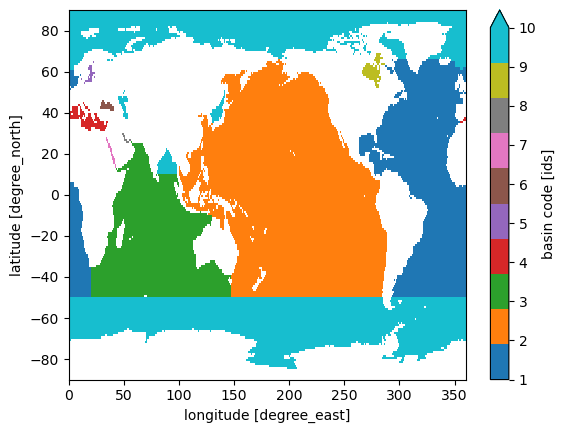

In [136]:
# Z is depth, so we select Z = 0 and drop the variable entirely
basin_surface = basin["basin"].sel(Z=0.0).drop_vars("Z")
basin_surface.plot(vmax=10, cmap='tab10')

The next step is to align both data sets. For this application, using the 'nearest' available data point will work to map both data sets with each other. Xarray provides the function `interp_like` to interpolate the `basin_surface` to the `sst` variable:

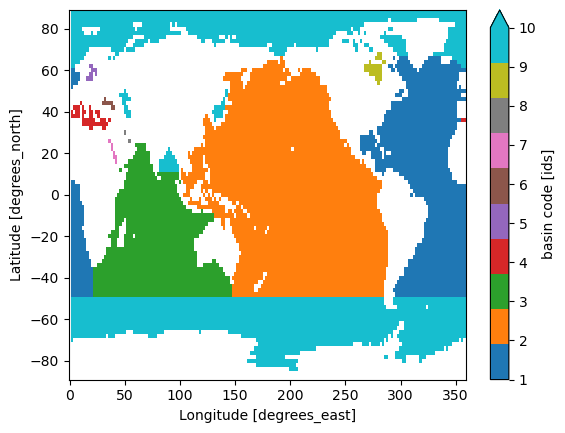

In [137]:
basin_surface_interp = basin_surface.interp_like(sst, method='nearest')
basin_surface_interp.plot(vmax=10, cmap='tab10')

In [138]:
# This results in a dataarray with each of the lat/lon coords in sst being assigned a basin identifier
basin_surface_interp

<xarray.DataArray 'basin' (lat: 89, lon: 180)>
array([[nan, 11., 11., ..., 11., 11., 11.],
       [nan, 11., 11., ..., 11., 11., 11.],
       [nan, 11., 11., ..., 11., 11., 11.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  basin code
    scale_max:  58
    CLIST:      Atlantic Ocean\nPacific Ocean \nIndian Ocean\nMediterranean S...
    valid_min:  1
    valid_max:  58
    scale_min:  1
    units:      ids

<div class="alert alert-success">

**EXERCISE 9**:

Compute the mean SST (over all dimensions) for each of the basins in the `basin_surface` variable starting from the `sst` variable. 

Next, we want to plot a horizontal bar chart with the SST for each bar chart. To do so:
    
- Convert the output to Pandas DataFrame.
- Combine the output with the `basin_s` variable by merging on the index (identifiers of the basin names).
- Create a horizontal barplot of the average temperature for each of the basins using the resulting dataframe.
   
<details>

<summary>Hints</summary>

- Use a `groupby` with the `basin_surface_interp` as input.
- Joining and merging of tables? See the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). 

</details>    
    
</div>

In [145]:
basin_sst = sst.groupby(basin_surface_interp).mean(...)

basin_sst_df = basin_sst.to_dataframe().reset_index()

basin_sst_df

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


,basin,sst
0,1.0,19.367807
1,2.0,21.264580
2,3.0,21.203249
3,4.0,19.938990
4,5.0,8.150210
5,6.0,15.153743
6,7.0,28.530907
7,8.0,26.736147
8,9.0,0.440651
9,10.0,1.616009


In [148]:
basin_sst_df['basin'] = basin_sst_df['basin'].map(basin_s.to_dict())

basin_sst_df

,basin,sst
0,Atlantic Ocean,19.367807
1,Pacific Ocean,21.264580
2,Indian Ocean,21.203249
3,Mediterranean Sea,19.938990
4,Baltic Sea,8.150210
5,Black Sea,15.153743
6,Red Sea,28.530907
7,Persian Gulf,26.736147
8,Hudson Bay,0.440651
9,Southern Ocean,1.616009


<Axes: ylabel='basin'>

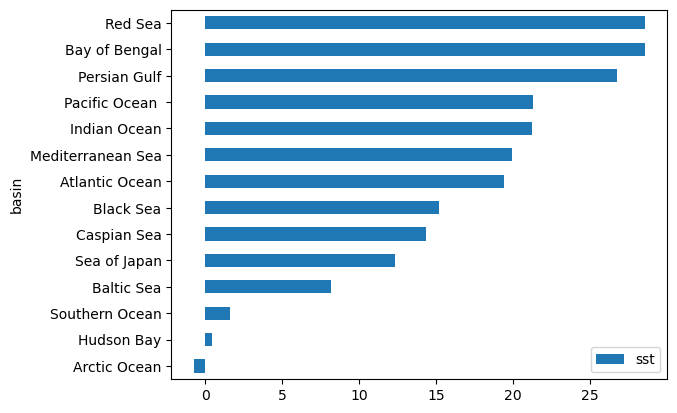

In [162]:
basin_sst_df.sort_values(by = 'sst').plot.barh(x = 'basin')

In [ ]:
# %load _solutions/case-sea-surface-temperature18.py
basin_mean_sst = sst.groupby(basin_surface_interp).mean()
basin_mean_sst = basin_mean_sst.mean(dim="time")

In [157]:
# %load _solutions/case-sea-surface-temperature19.py
# In such a situation, the ELLIPSIS can be used to aggregate over all dimensions
basin_mean_sst = sst.groupby(basin_surface_interp).mean(dim=...) # ellipsis is shortcut for all dimensions
basin_mean_sst

<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast


<xarray.DataArray 'sst' (basin: 14)>
array([19.367807  , 21.26458   , 21.203249  , 19.93899   ,  8.15021   ,
       15.153743  , 28.530907  , 26.736147  ,  0.44065136,  1.6160094 ,
       -0.7505018 , 12.300379  , 14.34969   , 28.52797   ], dtype=float32)
Coordinates:
  * basin    (basin) float32 1.0 2.0 3.0 4.0 5.0 ... 10.0 11.0 12.0 53.0 56.0
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    actual_range:  [-1.8  33.95]
    valid_range:   [-5. 40.]
    dataset:       NOAA Extended Reconstructed SST V4
    parent_stat:   Individual Values

In [158]:
# %load _solutions/case-sea-surface-temperature20.py
# Convert to a Pandas DataFrame:
basin_mean_df = basin_mean_sst.to_dataframe()
basin_mean_df

,sst
basin,
1.0,19.367807
2.0,21.264580
3.0,21.203249
4.0,19.938990
5.0,8.150210
6.0,15.153743
7.0,28.530907
8.0,26.736147
9.0,0.440651


In [159]:
# %load _solutions/case-sea-surface-temperature21.py
# Merge the data with the `basin_s` data on the index:
basin_mean_df_merged = pd.merge(basin_mean_df, basin_s, left_index=True, right_index=True)

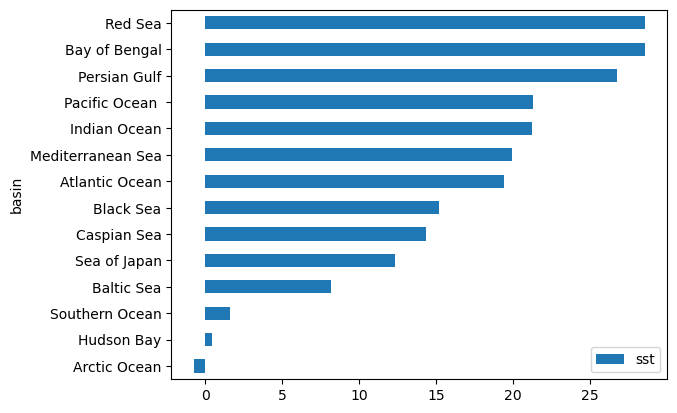

In [160]:
# %load _solutions/case-sea-surface-temperature22.py
# Create a bar chart of the SST per basin data:
basin_mean_df_merged.sort_values(by="sst").plot.barh(x="basin");

-------

Acknowledgements to https://earth-env-data-science.github.io/lectures/xarray/xarray-part2.html